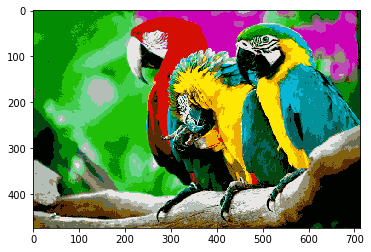

In [8]:
from skimage.io import imread
from skimage import img_as_float32
from sklearn.cluster import KMeans
%matplotlib inline
import numpy as np
import pandas as pd
image=imread('parrots.jpg')
image=img_as_float32(image)
import pylab
X=np.array(image.reshape((image.shape[0]*image.shape[1],3)))
#найдите минимальное количество кластеров, для которых PSNR>=20
from skimage.measure import compare_psnr
for s in range(8,21):
    kmeans=KMeans(init='k-means++',random_state=241,n_clusters=s)
    kmeans.fit(X)
    y=kmeans.labels_
    X_median=np.array(X)
    X_mean=np.array(X)
    for i in range(s):
        X_median[y==i]=np.median(X_median[y==i],axis=0)
        X_mean[y==i]=np.mean(X_mean[y==i],axis=0)
    image_median=X_median.reshape(image.shape[0],image.shape[1],3)
   
    image_mean=X_mean.reshape(image.shape[0],image.shape[1],3)
    pylab.imshow(image_mean)
    #print('n_clusters=',s," PSNR_median=", compare_psnr(image,image_median),
         # " PSNR_mean=",compare_psnr(image,image_mean))
pylab.imshow(image_median)